# Machine Learning Application in Finance
# &emsp; NNO6459-BNNO1, Spring 2021

### &emsp; &emsp; Professor: Philip Sun
### &emsp; &emsp; Email: philip.sun@faculty.hult.edu
### &emsp; &emsp; Last Modified: 3/4/2021

___

## Class 2: From Multiple Regression to Decisions Trees and Unsupervised Learning

## &emsp; Ex1 Predict S&P500 using Moving Averages

In [1]:
# import modules

import math
import numpy as np
import pandas as pd
import yfinance as yf 

#you should have this installed from Class 1.

import datetime as dt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
import matplotlib as plt


In [2]:
#download multiple tickers

#data = yf.download("^GSPC ^VIX ^TNX ^IRX", start="1999-12-31", end="2021-03-2", interval='1d')

data = yf.download("^GSPC", start="1999-12-31", end="2021-03-2", interval='1d')
data= pd.DataFrame(data['Adj Close'].dropna())
data


[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1999-12-31,1469.250000
2000-01-03,1455.219971
2000-01-04,1399.420044
2000-01-05,1402.109985
2000-01-06,1403.449951
...,...
2021-02-23,3881.370117
2021-02-24,3925.429932
2021-02-25,3829.340088


In [3]:
#Calculating returns and moving averages:

#Creating up to 200 offsets of price to compute up to 200-day MA

price=data.copy()

for ioffset in range(200):
    price['p'+str(ioffset+1)]=data['Adj Close'].shift(ioffset+1)
    
# Calculating Moving Averages

for ma_per in [5, 10, 20, 50, 100, 200]:
    data['ma_'+str(ma_per)]=np.mean(price.iloc[:,0:(ma_per-1)],1)

# Transform from Price space to return space

data['ret']=data['Adj Close']/price['p1']-1 
data['ma1/5']=data['Adj Close']/data['ma_5']-1
data['ma5/10']=data['ma_5']/data['ma_10']-1
data['ma10/50']=data['ma_10']/data['ma_50']-1
data['ma20/50']=data['ma_20']/data['ma_50']-1
data['ma50/100']=data['ma_50']/data['ma_100']-1
data['ma50/200']=data['ma_50']/data['ma_200']-1

data['ret_sign']=data['ret']/np.abs(data['ret'])
data['ma1X5']=(data['ma1/5']/data['ma1/5'].shift(1)>0)*1
data['ma5X10']=(data['ma5/10']/data['ma5/10'].shift(1)>0)*1
data['ma10X50']=(data['ma10/50']/data['ma10/50'].shift(1)>0)*1
data['ma20X50']=(data['ma20/50']/data['ma20/50'].shift(1)>0)*1
data['ma50X100']=(data['ma50/100']/data['ma50/100'].shift(1)>0)*1
data['ma50X200']=(data['ma50/200']/data['ma50/200'].shift(1)>0)*1


In [17]:
data

,Adj Close,ma_5,ma_10,ma_20,ma_50,ma_100,ma_200,ret,ma1/5,ma5/10,...,ma20/50,ma50/100,ma50/200,ret_sign,ma1X5,ma5X10,ma10X50,ma20X50,ma50X100,ma50X200
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,1469.250000,1469.250000,1469.250000,1469.250000,1469.250000,1469.250000,1469.250000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,0,0,0,0,0,0
2000-01-03,1455.219971,1462.234985,1462.234985,1462.234985,1462.234985,1462.234985,1462.234985,-0.009549,-0.004797,0.000000,...,0.000000,0.000000,0.000000,-1.0,0,0,0,0,0,0
2000-01-04,1399.420044,1441.296672,1441.296672,1441.296672,1441.296672,1441.296672,1441.296672,-0.038345,-0.029055,0.000000,...,0.000000,0.000000,0.000000,-1.0,1,0,0,0,0,0
2000-01-05,1402.109985,1431.500000,1431.500000,1431.500000,1431.500000,1431.500000,1431.500000,0.001922,-0.020531,0.000000,...,0.000000,0.000000,0.000000,1.0,1,0,0,0,0,0
2000-01-06,1403.449951,1415.049988,1425.889990,1425.889990,1425.889990,1425.889990,1425.889990,0.000956,-0.008198,-0.007602,...,0.000000,0.000000,0.000000,1.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,3881.370117,3894.637512,3911.506673,3866.930536,3799.283686,3654.430104,3435.936539,0.001256,-0.003407,-0.004313,...,0.017805,0.039638,0.105749,1.0,1,1,1,1,1,1
2021-02-24,3925.429932,3897.502502,3913.234456,3876.123163,3804.630012,3659.931416,3440.937745,0.011352,0.007165,-0.004020,...,0.018791,0.039536,0.105696,1.0,0,1,1,1,1,1
2021-02-25,3829.340088,3878.160034,3903.563368,3878.331594,3808.341239,3664.789196,3445.757946,-0.024479,-0.012588,-0.006508,...,0.018378,0.039171,0.105226,-1.0,0,1,1,1,1,1


In [5]:
# Specify targets and features


# try different models :

ix=['ret','ma1/5','ma5/10', 'ma10/50', 'ma20/50', 'ma50/100', 'ma50/200'] #possible
#ix=['ret','ma1X5','ma5X10', 'ma10X50', 'ma20X50', 'ma50X100', 'ma50X200']
#ix=['ma1/5','ma5/10', 'ma10/50', 'ma20/50', 'ma50/100', 'ma50/200']
#ix=['ma5/10','ma20/50', 'ma50/200'] #Final Model

x1 = np.array(data[ix][199:-1]) #Final Model
y1 = np.array(data['ret'][200:])

# split data into training, validation and test data set.

x1tra=x1[0:round(len(y1)*0.6),:]
y1tra=y1[0:round(len(y1)*0.6)]
x1val=x1[round(len(y1)*0.6):round(len(y1)*0.8),:]
y1val=y1[round(len(y1)*0.6):round(len(y1)*0.8)]
x1test=x1[round(len(y1)*0.8):,:]
y1test=y1[round(len(y1)*0.8):]         
datevec=data.index[200:]
datetra=datevec[0:round(len(y1)*0.6)]
dateval=datevec[round(len(y1)*0.6):round(len(y1)*0.8)]
datetest=datevec[round(len(y1)*0.8):]
p0=data['Adj Close'][199]
p=np.array(data['Adj Close'])[200:]
ptra=p[0:round(len(y1)*0.6)]
pval=p[round(len(y1)*0.6):round(len(y1)*0.8)]
ptest=p[round(len(y1)*0.8):]



In [6]:
# Check vector and matrix sizes.

print(x1.shape, x1tra.shape, x1val.shape, x1test.shape)
print(y1.shape, y1tra.shape, y1val.shape, y1test.shape)
print(datevec.shape, datetra.shape, dateval.shape, datetest.shape)
p0=data['Adj Close'][199]


(5124, 7) (3074, 7) (1025, 7) (1025, 7)
(5124,) (3074,) (1025,) (1025,)
(5124,) (3074,) (1025,) (1025,)


In [7]:
#Create the decision tree regressor model

tree = DecisionTreeRegressor().fit(x1tra, y1tra)
tree_insample = tree.predict(x1tra)
tree_prediction = tree.predict(x1val)

#Create the linear regression model

lr = LinearRegression().fit(x1tra, y1tra)
lr_insample = lr.predict(x1tra)
lr_prediction = lr.predict(x1val)


In [8]:
# Compute Cummulative Return for the validation set

lentra=ptra.shape[0]
p_tree_insample=tree_insample.copy()
p_tree_insample[0]=p0*(1+tree_insample[0])
p_lr_insample=lr_insample.copy()
p_lr_insample[0]=p0*(1+lr_insample[0])

for i in range(lentra-1):
        p_tree_insample[i+1]=p_tree_insample[i]*(1+tree_insample[i+1])
        p_lr_insample[i+1]=p_lr_insample[i]*(1+lr_insample[i+1])


lenval=pval.shape[0]
p_tree_prediction=tree_prediction.copy()
p_tree_prediction[0]=p_tree_insample[-1]*(1+tree_prediction[0])
p_lr_prediction=lr_prediction.copy()
p_lr_prediction[0]=p_lr_insample[-1]*(1+lr_prediction[0])

for i in range(lenval-1):
        p_tree_prediction[i+1]=p_tree_prediction[i]*(1+tree_prediction[i+1])
        p_lr_prediction[i+1]=p_lr_prediction[i]*(1+lr_prediction[i+1])


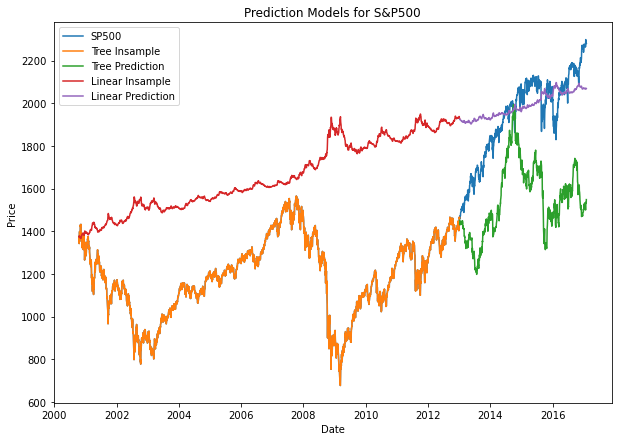

In [9]:
# Plot

import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(10,7))

plt.plot(np.append(datetra, dateval), np.append(ptra, pval))
plt.plot(datetra, p_tree_insample)
plt.plot(dateval, p_tree_prediction)
plt.plot(datetra, p_lr_insample)
plt.plot(dateval, p_lr_prediction)

plt.title('Prediction Models for S&P500')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['SP500','Tree Insample','Tree Prediction','Linear Insample','Linear Prediction'])



In [10]:
# Check Correlation Coefficients among the variables

pd.DataFrame(np.corrcoef(x1tra.T), index=ix, columns=ix)

#x1.T


,ret,ma1/5,ma5/10,ma10/50,ma20/50,ma50/100,ma50/200
ret,1.000000,0.787818,0.094700,0.014478,0.002508,0.007583,0.008755
ma1/5,0.787818,1.000000,0.322808,0.063622,0.030028,0.025260,0.026199
ma5/10,0.094700,0.322808,1.000000,0.293089,0.145013,0.063759,0.059689
ma10/50,0.014478,0.063622,0.293089,1.000000,0.936628,0.436972,0.341587
ma20/50,0.002508,0.030028,0.145013,0.936628,1.000000,0.500847,0.386718
ma50/100,0.007583,0.025260,0.063759,0.436972,0.500847,1.000000,0.841652
ma50/200,0.008755,0.026199,0.059689,0.341587,0.386718,0.841652,1.000000


In [11]:

# Estimate decision tree model on a rolling basis

warmup=round(len(y1)*0.2)
for i in range(len(y1)-warmup):
    x_tra=x1[i:warmup+i,:] #rolling decision tree 
    y_tra=y1[i:warmup+i] #rolling decision tree
    #x_tra=x1[0:warmup+i,:] #rolling decision tree 
    #y_tra=y1[0:warmup+i] #rolling decision tree
    tree = DecisionTreeRegressor().fit(x_tra, y_tra)
    if i==0:
        y_pred=tree.predict(x_tra)
        
    tree_pred=tree.predict(x1[warmup+i,:].reshape(1,-1))
    y_pred =  np.append(y_pred,tree_pred[-1])



    

In [12]:

print(np.mean((y_pred-y1)))
print(np.std((y_pred-y1)))
print(np.corrcoef(y1,y_pred)[0,1])
pd.DataFrame({'y': y1, 'y_pred': y_pred})


-0.00031967226010100585
0.016431748075618896
0.17635659298001446


,y,y_pred
0,0.000327,0.000327
1,-0.017932,-0.017932
2,-0.005808,-0.005808
3,0.034743,0.034743
4,0.005883,0.005883
...,...,...
5119,0.001256,-0.008412
5120,0.011352,-0.002196
5121,-0.024479,0.011251
5122,-0.004750,0.007255


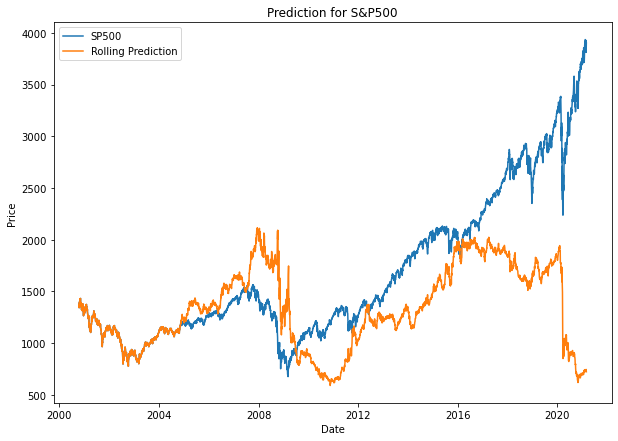

In [13]:
p_pred=y_pred.copy()
p_pred[0]=p0*(1+y_pred[0])
for i in range(len(y_pred)-1):
       p_pred[i+1]=p_pred[i]*(1+y_pred[i+1])
    
plt.figure(figsize=(10,7))

plt.plot(datevec, p)
plt.plot(datevec, p_pred)
plt.title('Prediction for S&P500')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['SP500','Rolling Prediction'])



# Assignment 2.a: Try several different models, 
### i.e., select various combinations of features using "ix" above.
### submit your notebook code with the results of your favorite model.
### Notebook code must complete run successfully.

[*********************100%***********************]  1 of 1 completed


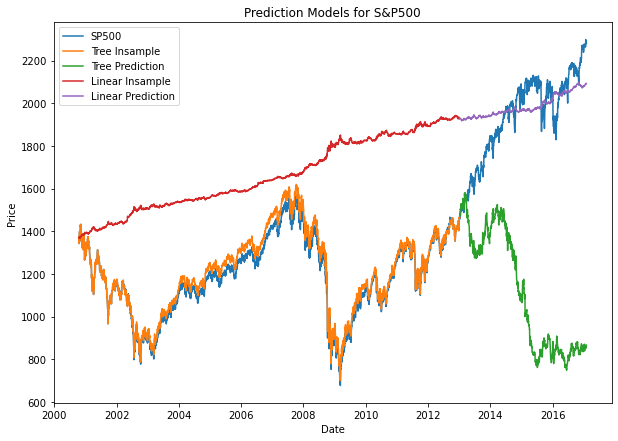

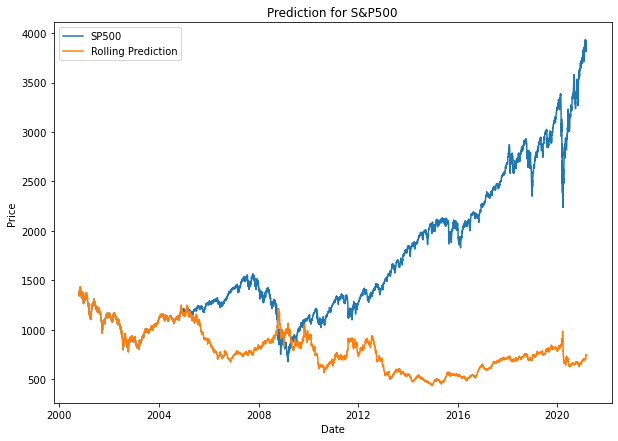

In [22]:
# Here is my answer


# import modules

import math
import numpy as np
import pandas as pd
import yfinance as yf 
import datetime as dt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
import matplotlib as plt
data = yf.download("^GSPC", start="1999-12-31", end="2021-03-2", interval='1d')
data= pd.DataFrame(data['Adj Close'].dropna())

#Calculating returns and moving averages:

#Creating up to 200 offsets of price to compute up to 200-day MA

price=data.copy()

for ioffset in range(200):
    price['p'+str(ioffset+1)]=data['Adj Close'].shift(ioffset+1)
    
# Calculating Moving Averages

for ma_per in [5, 10, 20, 50, 100, 200]:
    data['ma_'+str(ma_per)]=np.mean(price.iloc[:,0:(ma_per-1)],1)

# Transform from Price space to return space

data['ret']=data['Adj Close']/price['p1']-1 
data['ma1/5']=data['Adj Close']/data['ma_5']-1
data['ma5/10']=data['ma_5']/data['ma_10']-1
data['ma10/50']=data['ma_10']/data['ma_50']-1
data['ma20/50']=data['ma_20']/data['ma_50']-1
data['ma50/100']=data['ma_50']/data['ma_100']-1
data['ma50/200']=data['ma_50']/data['ma_200']-1

data['ret_sign']=data['ret']/np.abs(data['ret'])
data['ma1X5']=(data['ma1/5']/data['ma1/5'].shift(1)>0)*1
data['ma5X10']=(data['ma5/10']/data['ma5/10'].shift(1)>0)*1
data['ma10X50']=(data['ma10/50']/data['ma10/50'].shift(1)>0)*1
data['ma20X50']=(data['ma20/50']/data['ma20/50'].shift(1)>0)*1
data['ma50X100']=(data['ma50/100']/data['ma50/100'].shift(1)>0)*1
data['ma50X200']=(data['ma50/200']/data['ma50/200'].shift(1)>0)*1

# Specify targets and features

#ix=['ret','ma1/5','ma5/10', 'ma10/50', 'ma20/50', 'ma50/100', 'ma50/200'] 

ix=['ret','ma1X5','ma5X10', 'ma10X50', 'ma20X50', 'ma50X100', 'ma50X200']

#ix=['ma1/5','ma5/10', 'ma10/50', 'ma20/50', 'ma50/100', 'ma50/200']

#ix=['ma5/10','ma20/50', 'ma50/200'] #Final Model



x1 = np.array(data[ix][199:-1]) #Final Model
y1 = np.array(data['ret'][200:])

# split data into training, validation and test data set.

x1tra=x1[0:round(len(y1)*0.6),:]
y1tra=y1[0:round(len(y1)*0.6)]
x1val=x1[round(len(y1)*0.6):round(len(y1)*0.8),:]
y1val=y1[round(len(y1)*0.6):round(len(y1)*0.8)]
x1test=x1[round(len(y1)*0.8):,:]
y1test=y1[round(len(y1)*0.8):]         
datevec=data.index[200:]
datetra=datevec[0:round(len(y1)*0.6)]
dateval=datevec[round(len(y1)*0.6):round(len(y1)*0.8)]
datetest=datevec[round(len(y1)*0.8):]
p0=data['Adj Close'][199]
p=np.array(data['Adj Close'])[200:]
ptra=p[0:round(len(y1)*0.6)]
pval=p[round(len(y1)*0.6):round(len(y1)*0.8)]
ptest=p[round(len(y1)*0.8):]

#Create the decision tree regressor model

tree = DecisionTreeRegressor().fit(x1tra, y1tra)
tree_insample = tree.predict(x1tra)
tree_prediction = tree.predict(x1val)

#Create the linear regression model

lr = LinearRegression().fit(x1tra, y1tra)
lr_insample = lr.predict(x1tra)
lr_prediction = lr.predict(x1val)

# Compute Cummulative Return for the validation set

lentra=ptra.shape[0]
p_tree_insample=tree_insample.copy()
p_tree_insample[0]=p0*(1+tree_insample[0])
p_lr_insample=lr_insample.copy()
p_lr_insample[0]=p0*(1+lr_insample[0])

for i in range(lentra-1):
        p_tree_insample[i+1]=p_tree_insample[i]*(1+tree_insample[i+1])
        p_lr_insample[i+1]=p_lr_insample[i]*(1+lr_insample[i+1])


lenval=pval.shape[0]
p_tree_prediction=tree_prediction.copy()
p_tree_prediction[0]=p_tree_insample[-1]*(1+tree_prediction[0])
p_lr_prediction=lr_prediction.copy()
p_lr_prediction[0]=p_lr_insample[-1]*(1+lr_prediction[0])

for i in range(lenval-1):
        p_tree_prediction[i+1]=p_tree_prediction[i]*(1+tree_prediction[i+1])
        p_lr_prediction[i+1]=p_lr_prediction[i]*(1+lr_prediction[i+1])

# Plot

import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(10,7))

plt.plot(np.append(datetra, dateval), np.append(ptra, pval))
plt.plot(datetra, p_tree_insample)
plt.plot(dateval, p_tree_prediction)
plt.plot(datetra, p_lr_insample)
plt.plot(dateval, p_lr_prediction)

plt.title('Prediction Models for S&P500')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['SP500','Tree Insample','Tree Prediction','Linear Insample','Linear Prediction'])

# Check Correlation Coefficients among the variables

pd.DataFrame(np.corrcoef(x1tra.T), index=ix, columns=ix)


# Estimate decision tree model on a rolling basis

warmup=round(len(y1)*0.2)
for i in range(len(y1)-warmup):
    x_tra=x1[i:warmup+i,:] #rolling decision tree 
    y_tra=y1[i:warmup+i] #rolling decision tree
    #x_tra=x1[0:warmup+i,:] #rolling decision tree 
    #y_tra=y1[0:warmup+i] #rolling decision tree
    tree = DecisionTreeRegressor().fit(x_tra, y_tra)
    if i==0:
        y_pred=tree.predict(x_tra)
        
    tree_pred=tree.predict(x1[warmup+i,:].reshape(1,-1))
    y_pred =  np.append(y_pred,tree_pred[-1])

pd.DataFrame({'y': y1, 'y_pred': y_pred})

p_pred=y_pred.copy()
p_pred[0]=p0*(1+y_pred[0])
for i in range(len(y_pred)-1):
       p_pred[i+1]=p_pred[i]*(1+y_pred[i+1])
    
plt.figure(figsize=(10,7))

plt.plot(datevec, p)
plt.plot(datevec, p_pred)
plt.title('Prediction for S&P500')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['SP500','Rolling Prediction'])



# Assignment 2.b (Optional): How might you trade on this strategy? 
### Hint, you may long or short up to 100% of capital.


In [14]:
### write the code for your strategy and run a backtest:


In [15]:
### What is the annualized:
# mean return:

# standard deviation of return:

# sharpe ratio (=mean/std):

In [16]:
### Plot a chart showing the growht of $1 of your strategy.
# if $1 is not exciting enough, think $1MM (million) or $1B (billion) :-).